In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
yolo = cv2.dnn.readNet('./YOLOV3/yolov3-spp.weights', './YOLOV3/yolov3-spp.cfg')

In [13]:
classes = []

with open('./YOLOV3/coco.names', 'r') as f:
    classes = f.read().splitlines()

In [18]:
img = cv2.imread('./images/bike.jpg')

blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB = True, crop = False)

blob.shape

(1, 3, 320, 320)

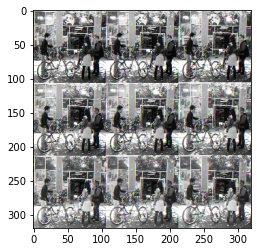

In [20]:
printImage = blob[0].reshape(320,320,3)
plt.imshow(printImage)

In [23]:
yolo.setInput(blob)

In [24]:
output_layes_names = yolo.getUnconnectedOutLayersNames()
layer_output = yolo.forward(output_layes_names)

In [45]:
boxes = []
confidences = []
class_ids = []

width = 1
height = 1

for output in layer_output:
    for detection in output:
        score = detection[5:] 
        class_id = np.argmax(score)
        confidence = score[class_id]
        
        if confidence > 0.7:
            center_x = int(detection[0]*img.shape[0])
            center_y = int(detection[0]*img.shape[1])
            w = int(detection[0]*img.shape[0])
            h = int(detection[0]*img.shape[1])
            
            x = int(center_x - w/2)
            y = int(center_y - h/2) 
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [46]:
indexes= cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [47]:
len(boxes)

5

In [48]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size=(len(boxes),3))

In [59]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    
    label = str(classes[class_ids[i]])
    conf= str(round(confidences[i],2))
    color = colors[i]
    
    cv2.rectangle(img,(x,y), (x+w, y+h), color, 2)
    cv2.putText(img, label + ' ' + conf, (x, y + 20), font, 2, (255,255,255),2)

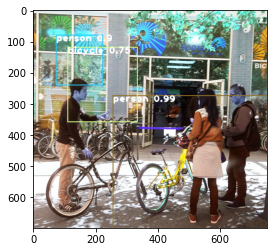

In [60]:
plt.imshow(img)

In [61]:
cv2.imwrite('./images/img.jpg',img)

True